# Data Analysis

# Importing Libraries

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Reading the Data

**IMPORTANT NOTE**: Please refer to *Data Cleaning Phase 1* in *DataCleaningFeatEng.ipynb* notebook to see the steps taken to get the books_updated.csv

In [3]:
df = pd.read_csv("books_updated.csv")

In [4]:
# look at the first 5 rows of the DataFrame
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
# look at the last 5 rows of the DataFrame
df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


In [6]:
# .sample() is important to see random content of the DataFrame
df.sample(5) 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
4528,16319,The Body in the Library (Miss Marple #3),Agatha Christie,3.85,157912626X,9781579126261,eng,191,46454,1675,9/1/2006,Black Dog & Leventhal Publishers
8676,33454,Bloodsucking Fiends (A Love Story #1),Christopher Moore,3.94,0060735414,9780060735418,eng,300,52843,1868,6/1/2004,HarperCollins
4976,17986,Teleny or the Reverse of the Medal,Oscar Wilde,3.67,1595690360,9781595690364,eng,138,985,63,3/7/2006,MONDIAL
9596,38262,Moll Flanders,Daniel Defoe/Mark Schorer/Georgina Sutton,3.52,1853260738,9781853260735,eng,339,35344,975,10/5/1993,Wordsworth Editions
1695,5898,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.50,0007136587,9780007136582,eng,1200,682,43,9/16/2002,Not Avail


# Data Analysis - Phase 1

## General Overview

The data set is made of 12 columns, as seen below, with 5 of them of numerical type and the other are of object type (i.e. string in this case). Also, there are no nan values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [9]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


We see above the description of the 5 numerical columns : 
- The first column is the "average_rating", and it's the target column. It's of type float, that has a minimum of 0 and a maximum of 5, with a mean at 3,9.
- The second column is the "isbn13" (International Standard Book Number). It's of type integer, but it's only a number used to identify books. Their numerical values don't have valid informations.
- The "num_pages" column refers to the number of pages of each book. We see that the min is 0; this definitely needs to be invesitaged!
- The "ratings_count" and the "text_reviews_count" columns are the number of ratings and the number of text_reviews the book received in goodreads. We notice that there is far more ratings than text_reviews, which seems normal.

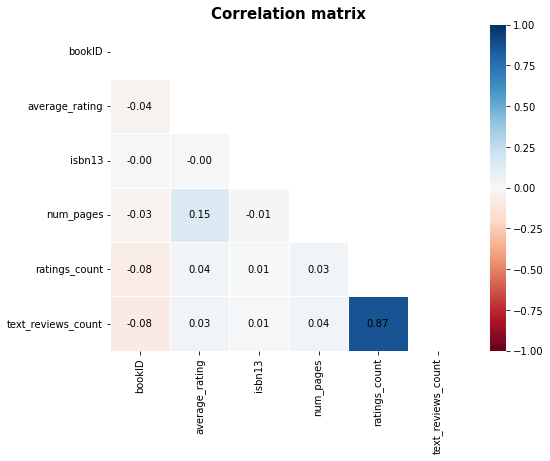

In [10]:
# Creation of a correlation matrix, to see the link between average_rating and all the numerical columns

numeric_columns = df.select_dtypes(include=['number']) 
matrix = numeric_columns.corr()

# Create a mask to hide the upper triangle 
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 6))

# Create the heatmap without annotations
sns.heatmap(matrix, mask=mask, center=0, cmap='RdBu', linewidths=1, annot=False, vmin=-1, vmax=1, ax=ax)

# Manually annotate the heatmap
for i in range(len(matrix)):
    for j in range(len(matrix)):
        if mask[i, j] == False:
            ax.text(j + 0.5, i + 0.5, f"{matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=10)
            
plt.title('Correlation matrix', fontsize=15, fontweight='bold')
plt.show()


We notice that the two features which are very highly correlated are the ratings_count and the test_reviews_count at a correlation of 0.87, which makes sense.

Other features are not very correlated. The average_rating and the num_pages are slightly correlated at a correlation of 0.15.

## Analysing Different Features

### *average_rating (the target)*

We start by looking at our target, the average_rating. 

A histogram is used to see how the data is distributed

C:\Users\cleme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


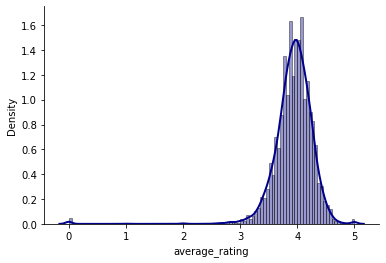

In [11]:
sns.distplot(df['average_rating'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Remove the top and right edges
sns.despine(right=True, top=True)


# Show the plot
plt.show()

It is obvious that the average rating is imbalanced, with the majority of the ratings between 3.5 and 4.5.

In order to get a closer look into the average rating, we use pd.cut and value_counts to group the ratings into categories

In [13]:
# use pd.cut and value_counts to get more insights into average rating by putting them into categories

# Define bins and labels
bins = [0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

# Create a new column with the bin labels
rating_category = pd.cut(df['average_rating'], bins=bins, labels=labels, right=False)

# Count the number of ratings in each category
rating_counts_per_category = rating_category.value_counts()

# Display the result
print(rating_counts_per_category)

3.5-4    5439
4-4.5    4724
3-3.5     649
4.5-5     208
2.5-3      48
0-1        26
2-2.5       8
1-1.5       2
1.5-2       1
Name: average_rating, dtype: int64


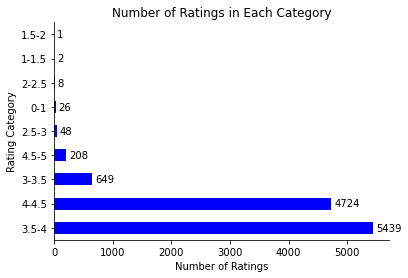

In [14]:
# Plot the total number of ratings belonging to each category 
# Plot the bar graph with different colors for each bar

# Plot the bar graph
ax = rating_counts_per_category.plot(kind='barh', color='Blue')

# Remove upper and left spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
plt.ylabel('Rating Category')
plt.xlabel('Number of Ratings')
plt.title('Number of Ratings in Each Category')

# Display values next to each bar
for index, value in enumerate(rating_counts_per_category):
    plt.text(value + 50, index, str(value), ha='left', va='center')

# Show the plot
plt.show()

In [15]:
# Calculate the percentage of ratings between 3.5 and 4, and between 3.5 and 4.5 :
print("The percentage of ratings between 3.5 and 4 is: ", round(rating_counts_per_category[0]/sum(rating_counts_per_category)*100),"%")
print("The percentage of ratings between 3.5 and 4.5 is: ", round((rating_counts_per_category[0]+rating_counts_per_category[1])/sum(rating_counts_per_category)*100),"%")

The percentage of ratings between 3.5 and 4 is:  49 %
The percentage of ratings between 3.5 and 4.5 is:  92 %


In [16]:
# look at the rows with average_rating which are 5
df.query('average_rating == 5')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
786,2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,9/1/2006,Schirmer Mosel
855,2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,1/1/2002,Teaching Resources
1243,4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing
4126,14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,3/6/2003,BradyGames
4790,17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
4935,17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press
5025,18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
5476,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5478,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


From the above, we can notice, as expected, that the books with an average rating of 5 are books that have very few ratings count (between 0 and 5).

Similary, it is expected that books that got an average rating of 0, are books with no to very few ratings.

In [17]:
# Further investigate the average_rating which are 0
print("number of average_rating wich are 0 is: ", len(df.query('average_rating == 0')))

number of average_rating wich are 0 is:  26


In [18]:
# look at the rows with average_rating which are 0
df.query('average_rating == 0')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
4242,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,0916724948,9780916724948,eng,63,0,0,12/31/1997,Arts Publications


Looking at the above data, one can notice that the books with average_rating of 0 received no ratings (ratings_count and text_review_counts are 0 except on location index 1092 the text_review_counts is 1).

### Number of Pages

In [19]:
# use describe to get a general information of the num_pages
df.num_pages.describe()

count    11127.000000
mean       336.376921
std        241.127305
min          0.000000
25%        192.000000
50%        299.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

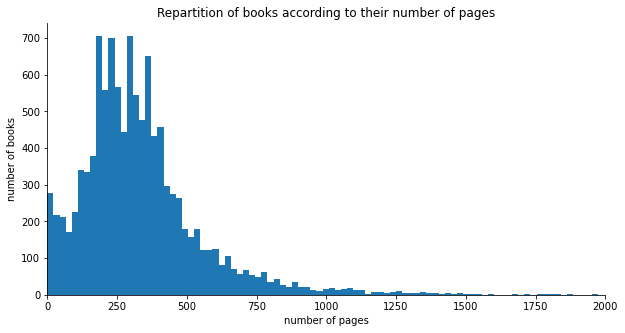

In [20]:
plt.figure(figsize=(10,5))
plt.hist(df['num_pages'],bins=300)
plt.xlabel('number of pages')
plt.ylabel('number of books')
plt.xlim(0,2000)
plt.title('Repartition of books according to their number of pages') 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [21]:
# check how many books have very high, very low and zero number of pages
print("number of books with pages more than 5000 is: ", len(df.query('num_pages >= 5000')))
print("number of books with pages between 2000 and 5000 is: ", len(df.query('2000 <= num_pages < 5000')))
print("number of books with pages between 1000 and 2000 is: ", len(df.query('1000 <= num_pages < 2000')))
print("number of books with pages between 5 and 10 is: ", len(df.query('5 <= num_pages < 10')))
print("number of books with pages less that 5 is: ", len(df.query('num_pages <= 5')))
print("number of books with zero pages are: ", len(df.query('num_pages == 0')))

number of books with pages more than 5000 is:  1
number of books with pages between 2000 and 5000 is:  11
number of books with pages between 1000 and 2000 is:  205
number of books with pages between 5 and 10 is:  63
number of books with pages less that 5 is:  148
number of books with zero pages are:  76


#### Link between average rating and number of pages

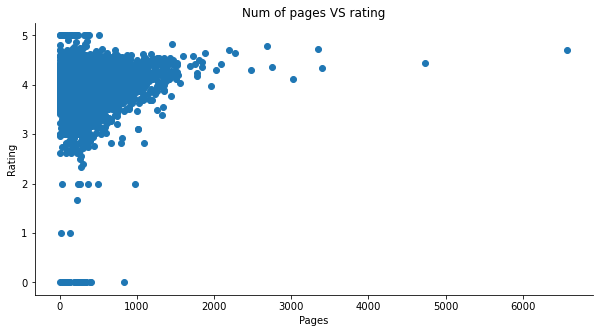

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(df['num_pages'],df['average_rating'])
plt.title("Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

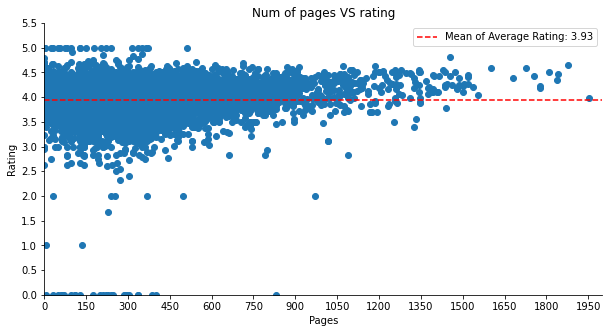

In [23]:
# Let's see this graph without all the extreme values by reducing the limits
mean_rating = df['average_rating'].mean()

plt.figure(figsize=(10,5))
plt.scatter(df['num_pages'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("Num of pages VS rating")
plt.xlabel("Pages")
plt.xlim(0,2000)
plt.ylabel("Rating")
plt.ylim(2.2,5)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, 2001, 150)) 
plt.yticks(np.arange(0, 6.0, 0.5)) 
plt.show()

Text(0.5, 1.02, 'Relationship between Average Rating and Number of Pages')

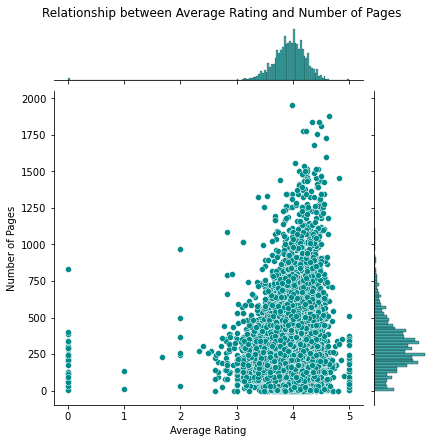

In [24]:
trial = df[(df['num_pages']<2000)]
ax = sns.jointplot(x="average_rating", y="num_pages", data = trial, color = 'darkcyan')
ax.set_axis_labels("Average Rating", "Number of Pages")
ax.fig.suptitle("Relationship between Average Rating and Number of Pages", y=1.02)

The relationship between the number of pages and average ratings can not be clearly infered from the above plots, but we notice that books with less than 450 pages got highest ratings (almost 5), and very large books do not have low ratings. 

#### Link between text review counts, rating counts and number of pages

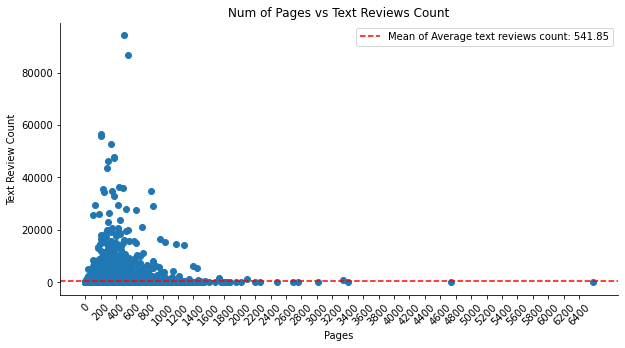

In [25]:
mean_text_rev_count = df['text_reviews_count'].mean()

plt.figure(figsize=(10,5))
plt.axhline(y=mean_text_rev_count, color='red', linestyle='--', label=f'Mean of Average text reviews count: {mean_text_rev_count:.2f}')
plt.scatter(df['num_pages'],df['text_reviews_count'])
plt.title("Num of Pages vs Text Reviews Count")
plt.xlabel("Pages")
plt.ylabel("Text Review Count")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, max(df['num_pages']) + 1, 200), rotation=45) 
plt.legend()

plt.show()

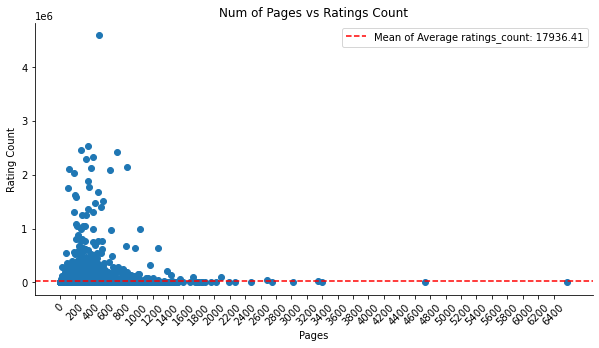

In [26]:
mean_ratings_count = df['ratings_count'].mean()

plt.figure(figsize=(10,5))
plt.axhline(y=mean_ratings_count, color='red', linestyle='--', label=f'Mean of Average ratings_count: {mean_ratings_count:.2f}')
plt.scatter(df['num_pages'],df['ratings_count'])
plt.title("Num of Pages vs Ratings Count")
plt.xlabel("Pages")
plt.ylabel("Rating Count")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0, max(df['num_pages']) + 1, 200), rotation=45) 
plt.legend()

plt.show()

LinAlgError: singular matrix

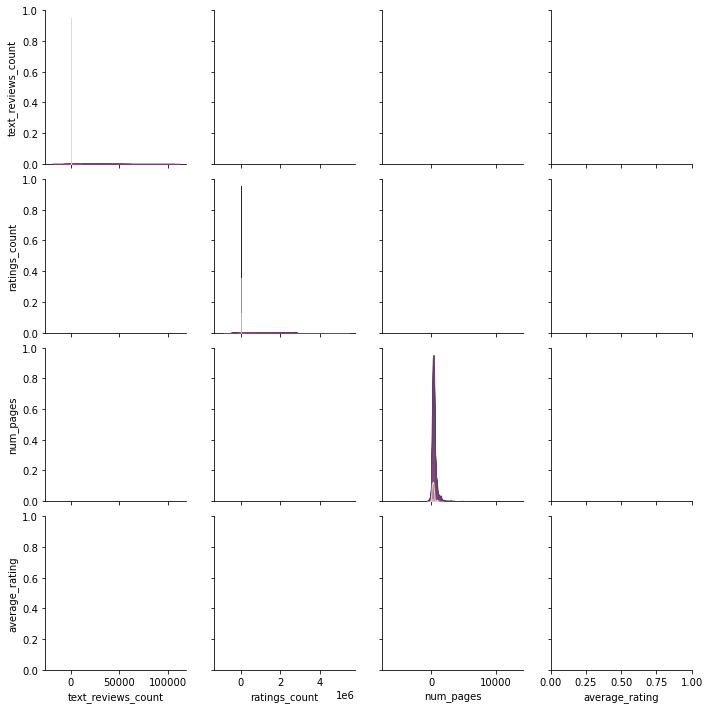

In [27]:
pairplot_vars = ['text_reviews_count', 'ratings_count', 'num_pages', 'average_rating']
sns.pairplot(df, vars=pairplot_vars, hue="average_rating")
plt.show()

#### Books with Zero or few pages

In [29]:
df.loc[df['num_pages']==0,:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
306,955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
853,2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
1230,4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
...,...,...,...,...,...,...,...,...,...,...,...,...
10030,40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
10192,41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
10624,43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio
10926,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books


There seems to be a lot of books with very few pages. We will look at these in more details below. 

In [30]:
few_pages=df.loc[df['num_pages']<20,:] 

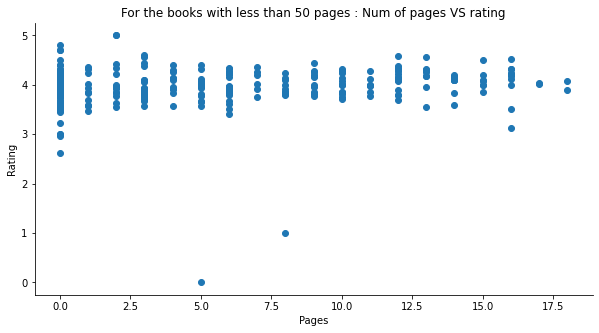

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(few_pages['num_pages'],few_pages['average_rating'])
plt.title("For the books with less than 50 pages : Num of pages VS rating")
plt.xlabel("Pages")
plt.ylabel("Rating")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [32]:
few_pages.sample(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
5801,21749,Bad Luck and Trouble (Jack Reacher #11),Lee Child,4.18,0739340670,9780739340677,eng,13,53,15,5/15/2007,Random House Audio
5843,21933,Point Of Impact (Bob Lee Swagger #1),Stephen Hunter/Beau Bridges,4.27,0739344242,9780739344248,eng,0,15,1,1/9/2007,RH Audio
1842,6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
9546,37902,Turn of the Cards,Georgina Grey,3.00,0449239691,9780449239698,eng,0,3,1,5/12/1979,Fawcett Coventry
10926,44748,The Mask of the Enchantress,Victoria Holt,3.85,0449210847,9780449210840,eng,0,21,1,10/12/1981,Ivy Books
1840,6540,Trace (Kay Scarpetta #13),Patricia Cornwell/Carolyn McCormick,3.78,0143058320,9780143058328,en-US,11,46,8,8/4/2005,Penguin Audio
4046,14378,Sweet Dreams Mimi (Baby Einstein),Julie Aigner-Clark/Nadeem Zaidi,3.13,0786851155,9780786851157,eng,16,37,3,4/1/2004,Disney Press
11081,45472,Treasury of American Tall Tales: Volume 1: Dav...,David Bromberg/Jay Ungar/Molly Mason/Garrison ...,3.86,0739336509,9780739336502,eng,0,36,9,8/22/2006,Listening Library (Audio)
8144,31270,The Altman Code (Covert-One #4),Gayle Lynds/Robert Ludlum/Don Leslie,3.95,1593978863,9781593978860,eng,0,5,1,9/30/2005,Audio Renaissance
10257,41559,Peek-a-Boo! (Babyfaces),Roberta Grobel Intrater,3.69,0590058967,9780590058964,eng,12,111,11,10/1/1997,Cartwheel


It's hard to believe that there is this much of books with less than 50 pages (especially those with less than 10 pages !) that have those high ratings. 

Additionally, by looking at the first few rows, some of these books are very well known books, which should have more than 20 pages.

##### One possible explanation: **Audio collection**

The data analysis showed that there is Audiobook on the file, so the number of pages is irrelevant for those lines.

In [33]:
df.loc[df['authors']=='NOT A BOOK',:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1061,3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
1064,3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
5476,19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
5477,19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
5478,19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


In [34]:
df.loc[(df['title'].str.contains('Audio', case=False)),:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
1325,4651,The Ernest Hemingway Audio Collection,Ernest Hemingway/Charlton Heston,4.30,0694524980,9780694524983,en-US,4,43,6,5/8/2001,Caedmon
1842,6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
5947,22337,The Neil Gaiman Audio Collection,Neil Gaiman,4.24,0060732989,9780060732981,eng,1,1666,208,8/31/2004,HarperFestival
6354,23922,The Edgar Allan Poe Audio Collection,Edgar Allan Poe,4.39,0694524190,9780694524198,eng,5,289,64,10/1/2000,Harper Audio
7446,28585,Judge Dredd (Audio Cassette),Neal Barrett Jr./Martha Banta,2.96,0553476793,9780553476798,eng,0,6,0,7/1/1995,Random House Audio
11008,45161,The Roald Dahl Audio Collection,Roald Dahl,4.41,0061214965,9780061214967,en-US,4,199,36,2/20/2007,HarperCollins Publishers


### Number of ratings and reviews

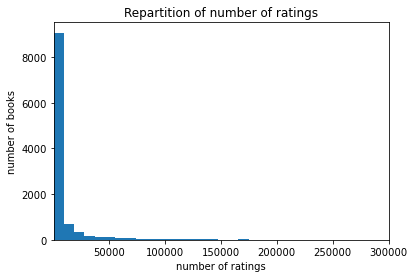

In [35]:
plt.hist(df['ratings_count'],bins=500)
plt.xlim(100,300000) # x limits to have a better view
plt.xlabel('number of ratings')
plt.ylabel('number of books')
plt.title('Repartition of number of ratings')
plt.show() 

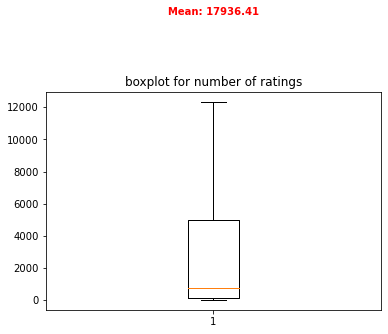

In [36]:
plt.boxplot(df['ratings_count'], 0, '')
plt.title('boxplot for number of ratings')
mean_value = df['ratings_count'].mean()
plt.text(1, mean_value, f'Mean: {mean_value:.2f}', ha='center', va='center', color='red', fontweight='bold')
plt.show()

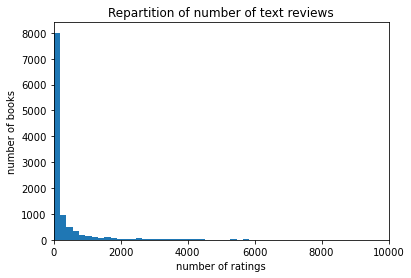

In [37]:
plt.hist(df['text_reviews_count'],bins=500)
plt.xlabel('number of ratings')
plt.xlim(0,10000)
plt.ylabel('number of books')
plt.title('Repartition of number of text reviews')
plt.show()

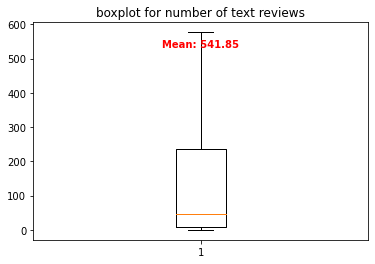

In [38]:
plt.boxplot(df['text_reviews_count'], 0, '')
plt.title('boxplot for number of text reviews')
mean_value = df['text_reviews_count'].mean()
plt.text(1, mean_value, f'Mean: {mean_value:.2f}', ha='center', va='center', color='red', fontweight='bold')
plt.show()

The vast majority of books don't have a lot of ratings or text reviews but there is some high extremes that influences the mean.

In [39]:
df.nlargest(10, 'text_reviews_count') #Lets look at the higher number of text review

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
5272,19063,The Book Thief,Markus Zusak/Cao Xuân Việt Khương,4.37,0375831002,9780375831003,eng,552,1516367,86881,3/14/2006,Alfred A. Knopf
1069,3636,The Giver (The Giver #1),Lois Lowry,4.13,0385732554,9780385732550,eng,208,1585589,56604,1/24/2006,Ember
284,865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,5/1/1993,HarperCollins
10704,43641,Water for Elephants,Sara Gruen,4.09,1565125606,9781565125605,eng,335,1260027,52759,5/1/2007,Algonquin Books
7312,28187,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,4.25,0786838655,9780786838653,eng,375,1766725,47951,3/1/2006,Disney Hyperion Books
5409,19501,Eat Pray Love,Elizabeth Gilbert,3.55,0143038419,9780143038412,eng,368,1362264,47620,2/1/2007,Riverhead Books
2060,7445,The Glass Castle,Jeannette Walls,4.27,074324754X,9780743247542,eng,288,808656,46176,1/17/2006,Scribner
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


In [40]:
df.nlargest(10, 'ratings_count') #Lest look at the higher number of text review

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company
1697,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1462,5107,The Catcher in the Rye,J.D. Salinger,3.80,0316769177,9780316769174,eng,277,2457092,43499,1/30/2001,Back Bay Books
307,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,4/1/2006,Pocket Books
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt
2114,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,0452284244,9780452284241,eng,122,2111750,29677,5/6/2003,NAL
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


Those books are really well known books so even if those are extreme values, they seems to be coherent.

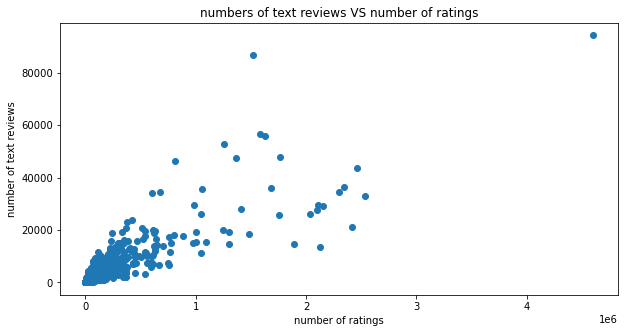

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df['ratings_count'],df['text_reviews_count'])
plt.title("numbers of text reviews VS number of ratings")
plt.xlabel("number of ratings")
plt.ylabel("number of text reviews")
plt.show()

In [42]:
print('The correlation between number or ratings and number of text reviews is',df['ratings_count'].corr(df['text_reviews_count']))

The correlation between number or ratings and number of text reviews is 0.8659786568124839


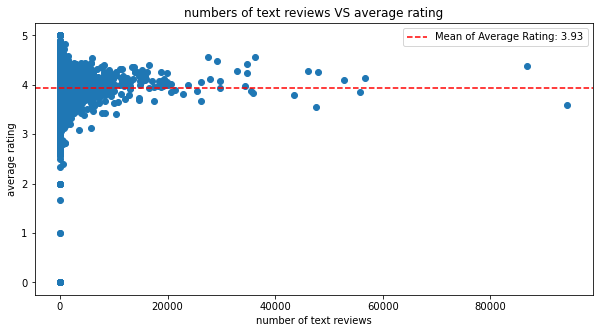

In [43]:
mean_rating = df['average_rating'].mean()
plt.figure(figsize=(10,5))
plt.scatter(df['text_reviews_count'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("numbers of text reviews VS average rating")
plt.xlabel("number of text reviews")
plt.ylabel("average rating")
plt.legend()
plt.show()

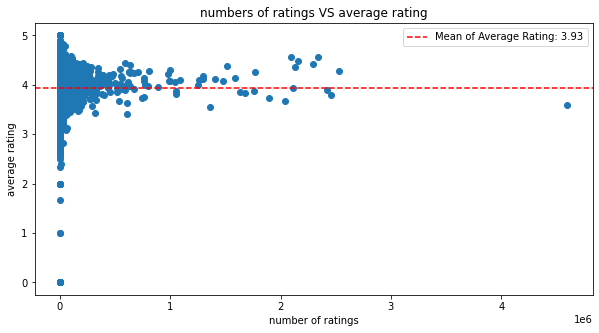

In [44]:
mean_rating = df['average_rating'].mean()
plt.figure(figsize=(10,5))
plt.scatter(df['ratings_count'],df['average_rating'])
plt.axhline(y=mean_rating, color='red', linestyle='--', label=f'Mean of Average Rating: {mean_rating:.2f}')
plt.title("numbers of ratings VS average rating")
plt.xlabel("number of ratings")
plt.ylabel("average rating")
plt.legend()
plt.show()

Number of ratings and number of reviews are correlated between eachother. There seems to be a link between number of reviews and rating, and the average rating, as books with a lot of ratings or reviews have a better average rating. 

### Languages

In [45]:
# number of languages code
number_of_languages = df["language_code"].nunique()
print("Number of language code :", number_of_languages)

Number of language code : 27


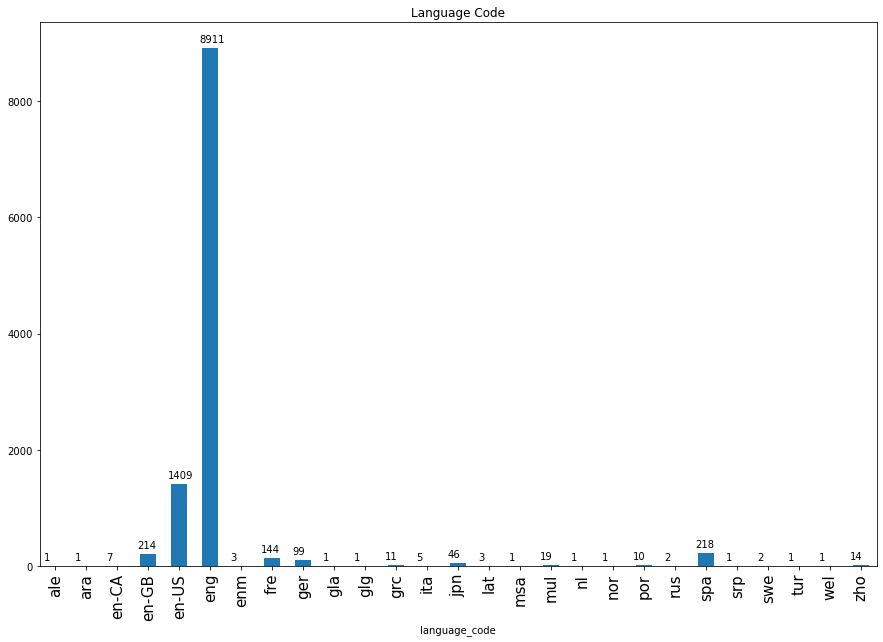

In [46]:
# Check the different type of languages
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+100))

In [47]:
num_books_english = len(df.loc[df['language_code'].str.contains('en', case=False)])
print("Number of books in english :", num_books_english, "out of", len(df))
print(round(num_books_english / len(df) * 100,2), "% of the books are in english")

Number of books in english : 10544 out of 11127
94.76 % of the books are in english


The vast majority of language_code belong to the english languages (en-CA: Canada, en-GB: Great Britain, enm: English Middle, en-US, eng). 
A feature engineering choice that can be done is have have a feature which creates two categories english and non-english books.

### Publisher

In [48]:
# number of publishers 
number_of_publisher = df["publisher"].nunique()
print("Number of publisher :", number_of_publisher)

Number of publisher : 2292


Even though that the number of unique publishers seems to be 2292, but we can notice, by further looking at the data, that some names belogning to the same publisher are written differently (e.g. at indexes 5993, 5365 and 9753, W.W. Norton & Company, W. W. Norton and Company and W. W. Norton  Company). Therefore, it is good to clean the publisher column before continuing investigation. 

In [49]:
# Define replacement rules
replacements = [
    ("inc.", ""),
    ("llc", ""),
    ("ltd", ""),
    ("w. w.", "ww"), 
    ("&", " and "),
    (r'\bbooks?\b', ""),  
    (r'\bclassics?\b', ""),
    (r'\bpublishers?\b', ""),
    (r'\bpress\b', ""),
    (r'\bpublishing\b', "")
    
]

# Apply replacements
cleaned_publisher = df["publisher"].str.lower()
for pattern, replacement in replacements:
    cleaned_publisher = cleaned_publisher.apply(lambda x: re.sub(pattern,replacement,x))

In [50]:
cleaned_publisher=cleaned_publisher.apply(lambda x: re.sub(r'\(.*?\)',"()",x)) #remove content in ()
cleaned_publisher=cleaned_publisher.apply(lambda x: re.sub(r'[^\w\s]', '', x)) # remove all punctuation
cleaned_publisher=cleaned_publisher.apply(lambda x: re.sub(r'\s\s+', " ", x)) # remove extra spaces
cleaned_publisher=cleaned_publisher.str.strip() # remove extra spaces to the left or right

In [51]:
cleaned_publisher[6596]

'andrews mcmeel'

In [52]:
cleaned_publisher.sample(5)

2229           macmillan audio
5020                      avon
7656                  back bay
5810    university of kentucky
7725                   vintage
Name: publisher, dtype: object

In [53]:
number_of_cleanPublisher = cleaned_publisher.nunique()
print("Number of publishers after doing some cleaning :", number_of_cleanPublisher)

Number of publishers after doing some cleaning : 1923


In [54]:
# Check for duplicates in a specific column using value_counts
publisher_counts = cleaned_publisher.value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(publisher_counts[publisher_counts > 1])

penguin               546
vintage               354
bantam                182
harpercollins         169
ballantine            150
                     ... 
the monacelli           2
peter smith             2
soho                    2
gallimard jeunesse      2
角川書店                    2
Name: publisher, Length: 907, dtype: int64


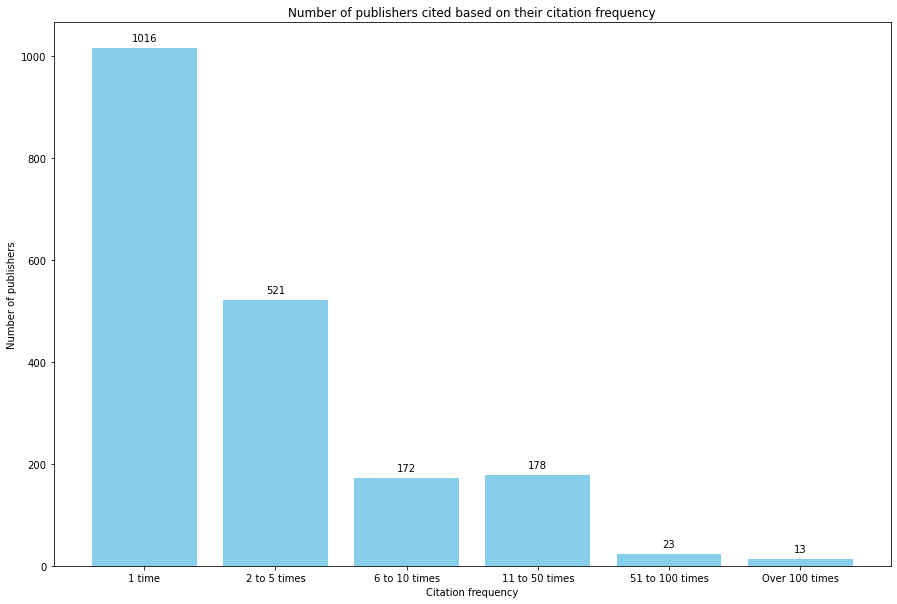

In [55]:
# Let's make an histogram to count the number of times each publisher is cited
# Define the categories for the histogram
bins = [1, 2, 5, 10, 50, 100, float('inf')]  # bins represent citation frequency intervals
labels = ['1 time', '2 to 5 times', '6 to 10 times', '11 to 50 times', '51 to 100 times', 'Over 100 times']

# Create a new column with the bin labels
publisher_category = pd.cut(publisher_counts, bins=bins, labels=labels, right=False)

# Count the number of publishers in each category
publisher_counts_per_category = publisher_category.value_counts()

# Define the desired order of categories
desired_order = ['1 time', '2 to 5 times', '6 to 10 times', '11 to 50 times', '51 to 100 times', 'Over 100 times']

# Sort the publisher counts according to the desired order
publisher_counts_per_category = publisher_counts_per_category.reindex(desired_order)

# Plot the total number of publishers belonging to each category 

# Plot the bar graph
plt.figure(figsize=(15,10))
# Create the histogram
plt.bar(range(len(publisher_counts_per_category)), publisher_counts_per_category.values, color='skyblue')

# Add title and axis labels
plt.title('Number of publishers cited based on their citation frequency')
plt.xlabel('Citation frequency')
plt.ylabel('Number of publishers')

# Add custom x-axis labels
plt.xticks(range(len(publisher_counts_per_category)), publisher_counts_per_category.index)

# Display values next to each bar
for index, value in enumerate(publisher_counts_per_category):
    plt.text(index, value+10, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

### Titles

In [56]:
# Check if the titles have dupliactes 
# first clean the title column - remove all punctuations and convert to lower case
df['clean_title'] = df['title'].str.replace('[^\w\s\d]', '', regex=True) # remove all punctuations - keeps numbers, letters and spaces in text
df['clean_title'] = df['title'].str.lower() # convert to lower case
df['clean_title']


0        harry potter and the half-blood prince (harry ...
1        harry potter and the order of the phoenix (har...
2        harry potter and the chamber of secrets (harry...
3        harry potter and the prisoner of azkaban (harr...
4        harry potter boxed set  books 1-5 (harry potte...
                               ...                        
11122     expelled from eden: a william t. vollmann reader
11123                          you bright and risen angels
11124                      the ice-shirt (seven dreams #1)
11125                                          poor people
11126                          las aventuras de tom sawyer
Name: clean_title, Length: 11127, dtype: object

In [57]:
# Check for duplicates in a specific column using value_counts
duplicates_count = df['clean_title'].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(duplicates_count[duplicates_count > 1])

the iliad                                                      9
the brothers karamazov                                         9
'salem's lot                                                   8
gulliver's travels                                             8
anna karenina                                                  8
                                                              ..
a passage to india                                             2
shield of thunder (troy  #2)                                   2
wide sargasso sea                                              2
harry potter and the prisoner of azkaban (harry potter  #3)    2
harry potter and the chamber of secrets (harry potter  #2)     2
Name: clean_title, Length: 511, dtype: int64


According to the above data, there are 511 books that have duplicates - i.e. that in the table two rows can can represent the same book

Let's further look in depth at some of these books, to understand why there are duplicates

In [58]:
df.query("clean_title == 'harry potter and the chamber of secrets (harry potter  #2)'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,harry potter and the chamber of secrets (harry...
4416,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,harry potter and the chamber of secrets (harry...


In [59]:
df.query("clean_title == 'harry potter and the prisoner of azkaban (harry potter  #3)'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,harry potter and the prisoner of azkaban (harr...
1233,4256,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,074757362X,9780747573623,eng,480,3141,140,7/1/2008,Bloomsbury UK,harry potter and the prisoner of azkaban (harr...


In [60]:
df.query("clean_title == 'the iliad'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
403,1371,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,0140275363,9780140275360,eng,683,288792,3423,4/29/1999,Penguin Classics,the iliad
405,1374,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,0374529051,9780374529055,en-US,588,692,81,4/3/2004,Farrar Straus and Giroux,the iliad
407,1376,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,0140447946,9780140447941,eng,462,1919,118,1/30/2003,Penguin Classics,the iliad
408,1377,The Iliad,Homer/W.H.D. Rouse,3.86,0451527372,9780451527370,en-US,312,158,15,8/1/1999,Signet Classics,the iliad
555,1796,The Iliad,Homer/Robert Fitzgerald,3.86,1857150600,9781857150605,eng,594,30,2,3/19/1992,Everyman,the iliad
3356,12254,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,0143059289,9780143059288,eng,8,42,7,6/15/2006,Penguin-HighBridge,the iliad
5906,22221,The Iliad,Homer,3.86,0471377589,9780471377580,eng,150,3834,134,10/28/1999,John Wiley & Sons,the iliad
8537,32780,The Iliad,Homer/Andrew Lang,3.86,1904633382,9781904633389,eng,542,64,8,9/1/2011,Collector's Library,the iliad
8539,32782,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,0753453215,9780753453216,eng,95,8,3,9/15/2000,Kingfisher,the iliad


In [61]:
df.query("clean_title == 'the brothers karamazov'")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
1406,4933,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Manuel Ko...,4.32,0451527348,9780451527349,eng,736,983,91,6/1/1999,Signet Classics,the brothers karamazov
1407,4934,The Brothers Karamazov,Fyodor Dostoyevsky/Fyodor Dostoevsky/Richard P...,4.32,0374528373,9780374528379,eng,796,191531,6795,6/14/2002,Farrar Straus and Giroux,the brothers karamazov
1408,4935,The Brothers Karamazov,Fyodor Dostoyevsky/David McDuff,4.32,0140449248,9780140449242,eng,1013,1673,184,2/27/2003,Penguin Books Ltd,the brothers karamazov
1409,4936,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0679729259,9780679729259,eng,796,617,80,9/3/1991,Vintage Books USA,the brothers karamazov
1410,4938,The Brothers Karamazov,Fyodor Dostoyevsky/Simon Vance/Thomas R. Beyer...,4.32,1596440791,9781596440791,eng,16,20,2,5/1/2005,Hovel Audio,the brothers karamazov
1411,4940,The Brothers Karamazov,Fyodor Dostoyevsky/Constance Garnett/Maire Jaanus,4.32,159308045X,9781593080457,eng,720,1089,202,7/25/2004,Barnes Noble Classics,the brothers karamazov
1634,5691,The Brothers Karamazov,Fyodor Dostoyevsky/Richard Pevear/Larissa Volo...,4.32,0099922800,9780099922803,eng,796,443,55,1/16/1992,Vintage Classics,the brothers karamazov
1990,7135,The Brothers Karamazov,Fyodor Dostoyevsky/Andrew R. MacAndrew/Konstan...,4.32,0553212168,9780553212167,eng,1072,1022,154,4/1/1984,Bantam Classics,the brothers karamazov
9356,37058,The Brothers Karamazov,Fyodor Dostoyevsky/Thomas R. Beyer Jr./Simon V...,4.32,1596440783,9781596440784,eng,16,3,1,5/1/2005,Hovel Audio,the brothers karamazov


We can see that even these books have the same title, but they differ in other features as publication date, authors, publishers, num_pages. **However, what is very interesting is that they all have the same average_rating i.e. books with same titles hold the same average_rating even if they differ in other features** 

In [62]:
# Investigate more to make sure what is noticed previously is true

# Group by 'clean_title' and count the number of unique 'average_rating'
ratings_count_by_title = df.groupby('clean_title')['average_rating'].nunique() #nunique counts the number of unique elements

duplicates_count_by_title = ratings_count_by_title[ratings_count_by_title > 1] # get titles that have 2 or more different ratings
print(duplicates_count_by_title)

clean_title
'salem's lot           2
1776                   2
a little princess      2
a matter of trust      2
alice in wonderland    2
                      ..
the stranger           2
the tale of genji      2
trainspotting          2
v for vendetta         2
white fang             2
Name: average_rating, Length: 65, dtype: int64


This tells us that not all books with the same titles have the same ratings

In [63]:
duplicates_count_by_title.value_counts()

2    59
3     3
4     2
6     1
Name: average_rating, dtype: int64

The value_counts tells us that there are 59 books of the same title that exhibit 2 different ratings, 3 that exhibit 3 different ratings, 2 that have 4 different ratings and 1 with 6 different ratings 

In [64]:
# change the title name to look at different samples
df.query('clean_title == "a little princess"') 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
914,3008,A Little Princess,Frances Hodgson Burnett/Nancy Bond,4.20,0142437018,9780142437018,eng,242,238192,4392,2/26/2002,Penguin Books,a little princess
9682,38643,A Little Princess,Frances Hodgson Burnett/Scott McKowen,4.20,1402714548,9781402714542,en-GB,208,500,54,10/1/2004,Sterling,a little princess
9683,38647,A Little Princess,Tania Zamorsky/Frances Hodgson Burnett/Lucy Co...,4.16,1402712758,9781402712753,eng,160,3784,84,3/1/2005,Sterling,a little princess


We can not deduce anything definite from the above results. Therefore, it is important to go to the website and further investigate. By looking at the website, we notice that books with the same name but different average ratings are actually different books. Also, books with the same name and same average ratings, but with different features, belong to the same book, but different ediitions. The average rating given is the aggregate rating of all the editions. Web scraping will be used to get the actual rating of each edition, as long to the format of the book, and the first published date. Different books with same names usually have different first published dates. Another feature will be added, which is shelves added. This represents the number of users added a book to a shelve.

## Part of a serie ?

In [ ]:
#Another information that we can deduce from the title is if this book is part from a serie (trilogy,...)

In [78]:
# Create a regular expression pattern to match titles containing numbers
pattern = r'\b\d{1,2}\b'  # This pattern matches 1 or 2 digits, if a number has more that 2 digits it's not a number of books in a serie

# Use the str.contains() method with the regex pattern to filter the DataFrame
books_with_number = df[df['title'].str.contains(pattern)]

# Print or further process the extracted books
books_with_number['title'].sample(20)

9864                                 Tears (Fearless  #15)
6851     Only the Ring Finger Knows: The Left Hand Drea...
8717                 Richard Matheson's Hell House  Book 2
6568                   Touching Darkness (Midnighters  #2)
7182                             Nicolae (Left Behind  #3)
9553                   The Last Dance (87th Precinct  #50)
8177        With No One as Witness (Inspector Lynley  #13)
6698                Fables & Reflections (The Sandman  #6)
10874    The Killer Angels: A Novel of the Civil War (T...
1021                        The Wedding (The Notebook  #2)
9655                       Sweet 18 (SVH Senior Year  #48)
5190     In Search of Lost Time  Vol. 2: Within a Buddi...
1911                            Smitten (Elsie Hawkins #2)
632                  The Long Goodbye (Philip Marlowe  #6)
9654     Aftershock  (Sweet Valley High Super Edition  ...
6270     The Lost Road and Other Writings (The History ...
3792       Death Note  Vol. 2: Confluence (Death Note  #

We can see that the vast majority of books with a number in the title are from a serie. Some books have a number in the title and are unique books (for example the book : "killing yourself to live :85% of a true story") but that's a minority. Without another way to know wich book is in a serie, we'll still add this column and accept the small error within it. 

In [79]:
#Let's analyse is being part of a serie has an impact on the average rate 
#Lets create another df for this analyse
df_serie=df.copy()

# Add a new column 'is_serie' with 1 for books with a number in the title and 0 for books without numbers
df_serie['is_serie'] = np.where(df_serie['title'].str.contains(pattern), 1, 0)

In [80]:
df_serie.sample(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title,first_author,is_serie
9590,38215,Lovingkindness: The Revolutionary Art of Happi...,Sharon Salzberg/Jon Kabat-Zinn,4.24,1590301870,9781590301876,eng,256,4373,144,12/28/2004,Shambhala,lovingkindness: the revolutionary art of happi...,Sharon Salzberg,0
909,2997,My Secret Garden: Women's Sexual Fantasies,Nancy Friday,3.68,0671019872,9780671019877,eng,361,1817,123,10/28/2003,Pocket Books,my secret garden: women's sexual fantasies,Nancy Friday,0
6672,25037,El rey de Les Halles,Juliette Benzoni/Francisco Rodriguez de Lecea,4.19,8466619453,9788466619455,spa,448,207,5,1/1/2007,Ediciones B,el rey de les halles,Juliette Benzoni,0
9698,38695,Holes,Louis Sachar,3.96,0440419468,9780440419464,eng,233,2699,230,3/11/2003,Yearling Books,holes,Louis Sachar,0
6431,24196,The Boys Start the War (Boy/Girl Battle #1),Phyllis Reynolds Naylor,4.02,0440418410,9780440418412,eng,144,1551,111,1/8/2002,Yearling,the boys start the war (boy/girl battle #1),Phyllis Reynolds Naylor,1


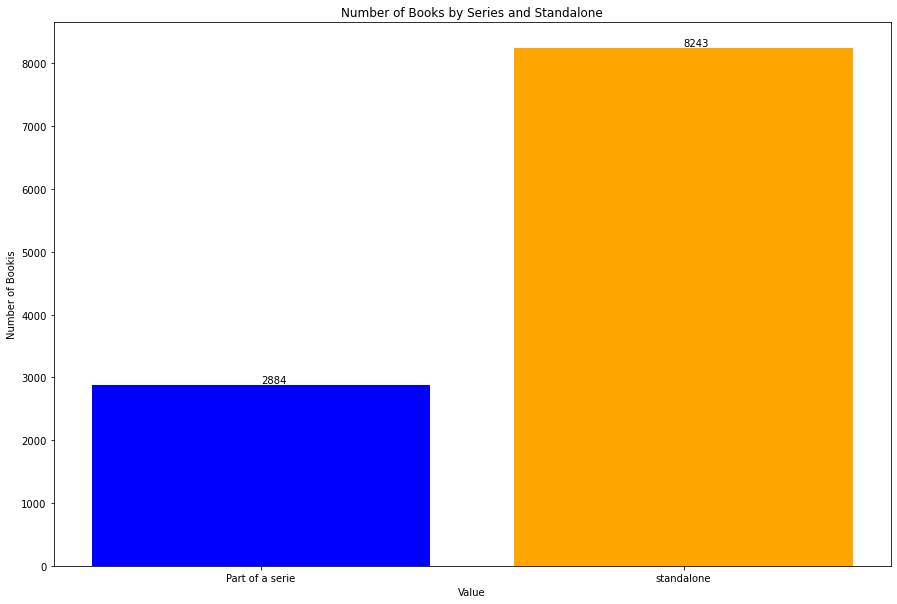

In [99]:
# Count the number of books with 1 and 0 in the 'is_serie' column
count_1 = df_serie['is_serie'].sum()
count_0 = len(df_serie) - count_1

# Plot the bar graph
plt.figure(figsize=(15,10))
# Create a bar plot
bars = plt.bar(['Part of a serie', 'standalone'], [count_1, count_0], color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Number of Bookis')
plt.title('Number of Books by Series and Standalone')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', va='bottom')

# Show the plot
plt.show()

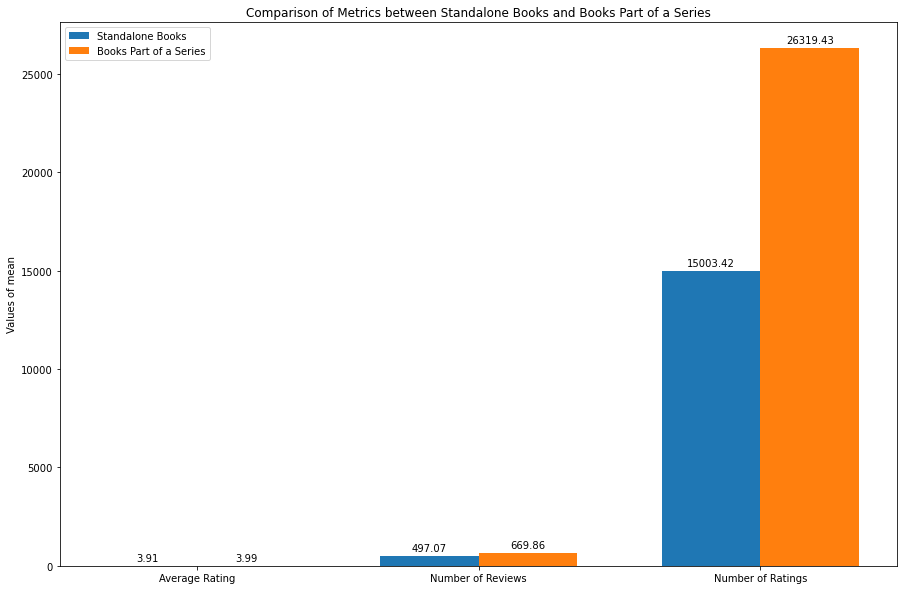

In [106]:
standalone_books = df_serie[df_serie['is_serie'] == 0]
series_books = df_serie[df_serie['is_serie'] == 1]

# Calculate the mean values for each metric for standalone books and books part of a series
avg_rating_standalone = standalone_books['average_rating'].mean()
avg_rating_series = series_books['average_rating'].mean()

num_reviews_standalone = standalone_books['text_reviews_count'].mean()
num_reviews_series = series_books['text_reviews_count'].mean()

num_ratings_standalone = standalone_books['ratings_count'].mean()
num_ratings_series = series_books['ratings_count'].mean()

# Plot the bar chart
categories = ['Average Rating', 'Number of Reviews', 'Number of Ratings']
standalone_values = [avg_rating_standalone, num_reviews_standalone, num_ratings_standalone]
series_values = [avg_rating_series, num_reviews_series, num_ratings_series]

x = range(len(categories))
width = 0.35

# Set the size of the figure
fig, ax = plt.subplots(figsize=(15, 10))

rects1 = ax.bar(x, standalone_values, width, label='Standalone Books')
rects2 = ax.bar([p + width for p in x], series_values, width, label='Books Part of a Series')

ax.set_ylabel('Values of mean')
ax.set_title('Comparison of Metrics between Standalone Books and Books Part of a Series')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(categories)
ax.legend()

# Add values on top of each bar
for rect in rects1:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

There is not a big impact on the average rating, but we see that books part of a serie have more ratings and more reviews. Those information are linked with average rating, so we will add this information (part of a serie or no) in the dataframe for machine learning.

### Author

In [65]:
# Check for duplicates in a specific column using value_counts
authors_counts = df["authors"].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(authors_counts[authors_counts > 1])

Stephen King                          40
P.G. Wodehouse                        40
Rumiko Takahashi                      39
Orson Scott Card                      35
Agatha Christie                       33
                                      ..
Marcia Angell                          2
Valerie Parv                           2
J.R.R. Tolkien/Alan  Lee               2
Karen Tei Yamashita                    2
Jane Leslie Conly/Leonard B. Lubin     2
Name: authors, Length: 1361, dtype: int64


In [66]:
# number of authors 
number_of_authors = df["authors"].nunique()
print("Number of authors :", number_of_authors)

Number of authors : 6643


In [67]:
agatha_christie_books=df.loc[(df['authors'].str.contains('Agatha Christie', case=False)),:]
agatha_christie_books.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
4517,16297,Cards on the Table (Hercule Poirot #15),Agatha Christie,3.92,0425205959,9780425205952,eng,324,25236,1046,7/5/2005,Berkley,cards on the table (hercule poirot #15)
4518,16298,A Murder Is Announced (Miss Marple #5),Agatha Christie,3.98,1579126294,9781579126292,eng,288,33195,1220,9/30/2006,Black Dog & Leventhal Publishers,a murder is announced (miss marple #5)
4519,16299,And Then There Were None,Agatha Christie,4.26,0312330871,9780312330873,eng,264,625767,18785,5/3/2004,St. Martin's Press,and then there were none
4520,16300,Sleeping Murder (Miss Marple #13),Agatha Christie,3.95,0002317850,9780002317856,eng,242,19657,884,8/4/2003,Dodd Mead; 1st edition (September 1976),sleeping murder (miss marple #13)
4521,16301,Agatha Christie: An Autobiography,Agatha Christie/Robert Welch Herrick,4.27,0006353282,9780006353287,eng,560,4296,310,1/2/2001,HarperCollins,agatha christie: an autobiography
4522,16304,Murder on the Orient Express (Hercule Poirot ...,Agatha Christie,4.17,0425200450,9780425200452,eng,322,145660,5711,8/31/2004,Berkley,murder on the orient express (hercule poirot ...
4523,16305,Evil Under the Sun (Hercule Poirot #24),Agatha Christie,3.97,1579126286,9781579126285,eng,220,36334,975,9/1/2006,Black Dog & Leventhal Publishers,evil under the sun (hercule poirot #24)
4524,16307,Hallowe'en Party (Hercule Poirot #39),Agatha Christie,3.66,0007120680,9780007120680,eng,336,20656,1246,9/3/2001,Harper,hallowe'en party (hercule poirot #39)
4525,16312,One Two Buckle My Shoe (Hercule Poirot #23),Agatha Christie/Hugh Fraser,3.76,1572703857,9781572703858,eng,0,14388,411,3/16/2004,HarperCollins Publishers,one two buckle my shoe (hercule poirot #23)
4526,16313,A Caribbean Mystery,Agatha Christie/Rosalind Ayres,3.80,1572705493,9781572705494,eng,0,49,10,10/9/2006,Audiogo,a caribbean mystery


In [68]:
print("There is", len(agatha_christie_books),"books with Agatha Christie as author")

There is 47 books with Agatha Christie as author


In [69]:
df.loc[(df['authors'].str.contains('Stephen King', case=False)),:]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,clean_title
1428,4978,Wolves of the Calla (The Dark Tower #5),Stephen King/Bernie Wrightson,4.18,141651693X,9781416516934,eng,931,127168,2801,2/1/2006,Pocket Books,wolves of the calla (the dark tower #5)
1459,5094,The Drawing of the Three (The Dark Tower #2),Stephen King,4.23,0451210859,9780451210852,eng,463,173022,5139,8/5/2003,Signet,the drawing of the three (the dark tower #2)
1564,5373,The Waste Lands (The Dark Tower #3),Stephen King/Ned Dameron,4.24,0747411875,9780747411871,eng,509,76,5,11/12/1992,Time Warner Paperbacks,the waste lands (the dark tower #3)
1571,5412,The Stand: Das letzte Gefecht,Stephen King/Joachim Körber,4.34,3404134117,9783404134113,ger,1227,256,16,9/1/2003,Bastei Lübbe,the stand: das letzte gefecht
1572,5413,'Salem's Lot,Stephen King/Jerry N. Uelsmann,4.25,0385516487,9780385516488,eng,594,84123,571,11/1/2005,Doubleday,'salem's lot
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8710,33544,Nightmare At 20 000 Feet,Richard Matheson/Stephen King,4.09,0312878273,9780312878276,eng,336,6502,272,1/5/2002,Tor Books,nightmare at 20 000 feet
8831,34084,The Waste Lands (The Dark Tower #3),Stephen King/Ned Dameron,4.24,0670032565,9780670032563,eng,422,145740,3382,6/23/2003,Viking Adult,the waste lands (the dark tower #3)
9253,36303,'Salem's Lot,Stephen King,4.02,0451139690,9780451139696,eng,427,186,22,8/1/1976,Signet,'salem's lot
9866,39661,The Shawshank Redemption: The Shooting Script,Frank Darabont/Stephen King,4.64,1557042462,9781557042460,eng,184,2406,29,9/30/2004,Newmarket Press,the shawshank redemption: the shooting script


In [70]:
# We see that the author column has sometimes several names. The other names can be : other author, the illustrator, the translator.
# We choose to keep only the first name, to see if the number of book per author increase.

df['first_author'] = df['authors'].apply(lambda x: x.split("/")[0]) # Extracting the string before the "/" symbol
df['first_author']

0               J.K. Rowling
1               J.K. Rowling
2               J.K. Rowling
3               J.K. Rowling
4               J.K. Rowling
                ...         
11122    William T. Vollmann
11123    William T. Vollmann
11124    William T. Vollmann
11125    William T. Vollmann
11126             Mark Twain
Name: first_author, Length: 11127, dtype: object

In [71]:
# number of authors 
number_of_first_authors = df['first_author'].nunique()
print("Number of first authors :", number_of_first_authors)

Number of first authors : 4219


In [72]:
# Check for number of books by first author
author_number_books = df['first_author'].value_counts()

# Display values with count greater than 1 (indicating duplicates)
print(author_number_books[author_number_books > 1])

William Shakespeare        88
Stephen King               82
J.R.R. Tolkien             51
P.G. Wodehouse             46
Agatha Christie            45
                           ..
Pierdomenico Baccalario     2
Greg Behrendt               2
Roger Lowenstein            2
C.D. Payne                  2
Wilson Rawls                2
Name: first_author, Length: 1463, dtype: int64


In [73]:
print("Number of author with just one book",len(author_number_books[author_number_books==1]))
print("Percentage of author with just one book :",round(len(author_number_books[author_number_books==1])/number_of_first_authors*100,2),"%")

Number of author with just one book 2756
Percentage of author with just one book : 65.32 %


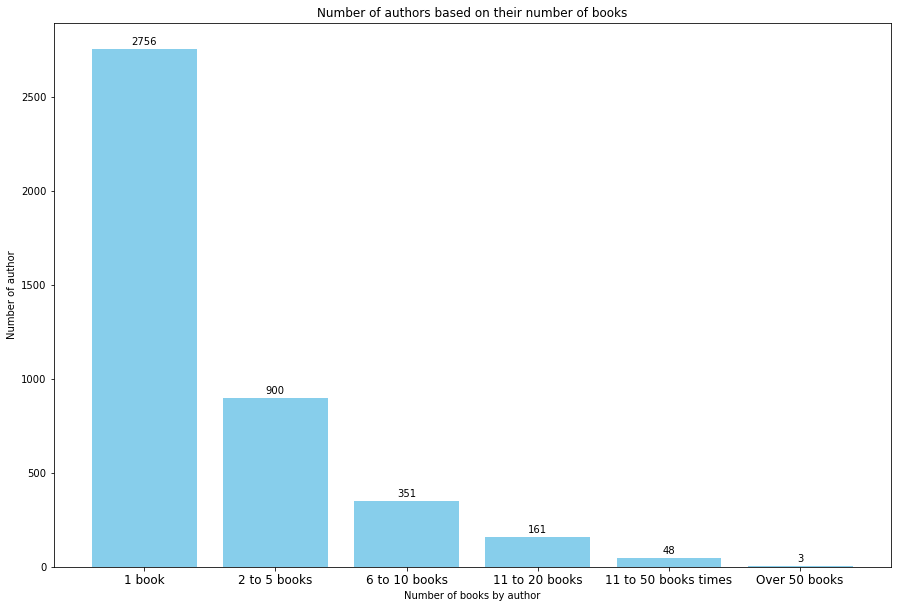

In [74]:
# Let's make an histogram to count the number of books by author
# Define the categories for the histogram
bins = [1, 2, 5, 10, 20, 50, float('inf')]  # bins represent citation frequency intervals
labels = ['1 book', '2 to 5 books', '6 to 10 books', '11 to 20 books', '11 to 50 books times', 'Over 50 books']

# Create a new column with the bin labels
author_category = pd.cut(author_number_books, bins=bins, labels=labels, right=False)

# Count the number of authors in each category
author_counts_per_category = author_category.value_counts()

# Define the desired order of categories
desired_order = ['1 book', '2 to 5 books', '6 to 10 books', '11 to 20 books', '11 to 50 books times', 'Over 50 books']

# Sort the author counts according to the desired order
author_counts_per_category = author_counts_per_category.reindex(desired_order)

# Plot the total number of authors belonging to each category 

# Plot the bar graph
plt.figure(figsize=(15,10))
# Create the histogram
plt.bar(range(len(author_counts_per_category)), author_counts_per_category.values, color='skyblue')

# Add title and axis labels
plt.title('Number of authors based on their number of books')
plt.xlabel('Number of books by author')
plt.ylabel('Number of author')

# Add custom x-axis labels with a specific font size
plt.xticks(range(len(author_counts_per_category)), author_counts_per_category.index, fontsize=12)

# Display values next to each bar
for index, value in enumerate(author_counts_per_category):
    plt.text(index, value+10, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

# Data Analysis - Phase 2